In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
#Read Data
data = pd.read_csv('../../SynData/data/GeneratedData.csv')
#data = pd.read_csv('/Users/psn/Desktop/Dataset.csv')



In [3]:
#General data info
data.head()

,Unnamed: 0,CPU,throughput
0,0,2.746560,194.447920
1,1,6.052445,288.489753
2,2,4.312178,247.764920
3,3,5.657870,274.500445
4,4,0.276564,37.136230


In [4]:
data.describe()

,Unnamed: 0,CPU,throughput
count,1000.000000,1000.000000,1000.000000
mean,499.500000,5.055952,243.497049
std,288.819436,2.865645,85.434593
min,0.000000,0.003582,0.537530
25%,249.750000,2.677284,192.695525
50%,499.500000,4.988130,263.943580
75%,749.250000,7.540200,314.262567
max,999.000000,9.982265,354.731051


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Unnamed: 0    1000 non-null int64
CPU           1000 non-null float64
throughput    1000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 23.5 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


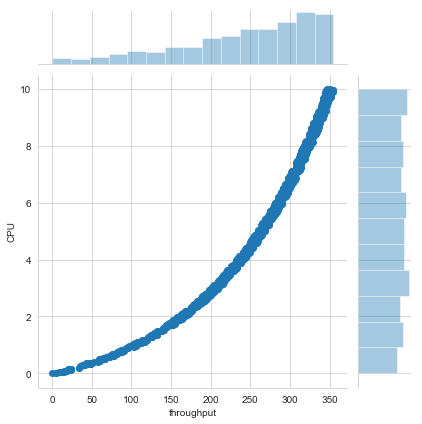

In [6]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter")


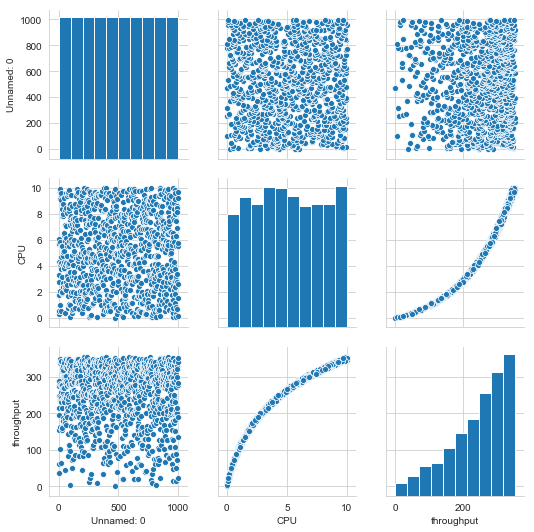

In [7]:
sns.pairplot(data)


In [8]:
data['throughput'].corr(data['CPU'])


0.9595509450961793

In [9]:
datalm = data


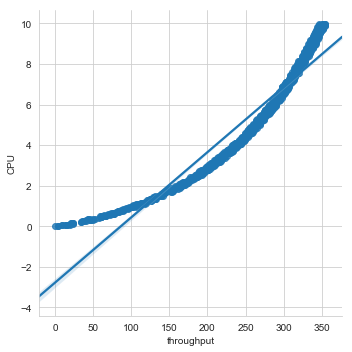

In [10]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [11]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())


scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
n = len(X)
kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#Ridge Model



In [12]:
#Ridge Hyperparameter tuning
rm = Ridge()
rm.fit(X_train,y_train)
clf = GridSearchCV(rm, {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.919394111049559
{'alpha': 0.03}


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.5s finished


In [13]:
#Test data prediction
prediction = clf.predict(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Actual,Predicted
0,9.117521,8.102091
1,4.701964,5.527441
2,9.588241,8.298569
3,5.431025,5.880252
4,5.483150,6.136515
5,7.977538,7.466776
6,3.814177,4.596606
7,0.322502,-1.353175
8,7.117448,6.956985
9,4.059269,5.040402


Text(0, 0.5, 'Predicted Y')

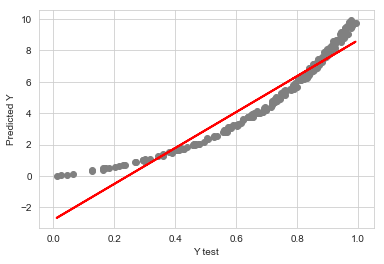

In [14]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")


In [15]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))




MAE: 0.6900961473918725
MSE: 0.6666085750752221
RMSE: 0.8164610064633964


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


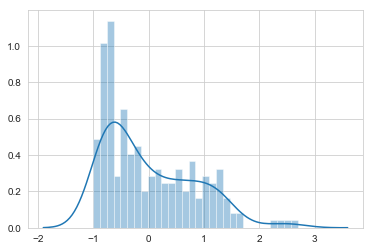

In [16]:
#Residuals
sns.distplot(y_test-prediction,bins=30)

In [17]:
# save the model to disk
filename = '../models/ridgeReg_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [19]:
rm.predict([[0.2243476]])

array([-0.12374991])